In [7]:
import math
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

from dython import nominal
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("Fuel.csv")
print("The shape of given dataset is ", df.shape)

The shape of given dataset is  (946, 15)


In [3]:
df.drop(columns="Model Year", inplace=True)

In [4]:
col_names = ["Make", "Model", "Vehicle", "Engine", "Cylinders", "Transmission", "Fuel", "FC_City", "FC_Hwy", "FC_Comb_L", "FC_Comb_Mpg", "Emission", "CO2", "Smog"]
df.columns = col_names

df.columns

Index(['Make', 'Model', 'Vehicle', 'Engine', 'Cylinders', 'Transmission',
       'Fuel', 'FC_City', 'FC_Hwy', 'FC_Comb_L', 'FC_Comb_Mpg', 'Emission',
       'CO2', 'Smog'],
      dtype='object')

In [5]:
sample_df = pd.get_dummies(df,columns=["Make", "Model", "Vehicle", "Transmission", "Fuel"])
sample_df.head()

,Engine,Cylinders,FC_City,FC_Hwy,FC_Comb_L,FC_Comb_Mpg,Emission,CO2,Smog,Make_Acura,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel_D,Fuel_E,Fuel_X,Fuel_Z
0,2.4,4,9.9,7.0,8.6,33,200,6,3,1,...,0,0,0,0,0,0,0,0,0,1
1,3.5,6,12.6,9.4,11.2,25,263,4,5,1,...,0,0,0,0,0,0,0,0,0,1
2,2.0,4,11.0,8.6,9.9,29,232,5,6,1,...,0,0,0,0,0,0,0,0,0,1
3,2.0,4,11.3,9.1,10.3,27,242,5,6,1,...,0,0,0,0,0,0,0,0,0,1
4,2.0,4,11.2,8.0,9.8,29,230,5,7,1,...,0,0,0,0,0,0,0,0,0,1


In [6]:
X = sample_df.drop(['CO2'], axis=1).values
Y = sample_df['CO2'].values
X_train, X_test, Y_train,Y_test = train_test_split(X,Y , test_size = 0.3, random_state = 0)

RANDOM FOREST REGRESSOR

DECISION TREE CLASSIFIER

In [9]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
pred_dt = decision_tree.predict(X_test)
#MSE = np.square(np.subtract(Y_test, pred_dt)).mean()
#RMSE = math.sqrt(MSE)
#print("RMSE: ", RMSE)

print("Recall score: %.3f" % recall_score(Y_test, pred_dt,average='weighted',zero_division=1))
print("F1 score: %.3f" % f1_score(Y_test, pred_dt,average='weighted',zero_division=1))
print('Precision Score: %.3f' % precision_score(Y_test, pred_dt,average='weighted',zero_division=1))

RMSE:  0.11867816581938534
Recall score: 0.986
F1 score: 0.983
Precision Score: 0.987


c:\Users\Sundas.Mohsin\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Sundas.Mohsin\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


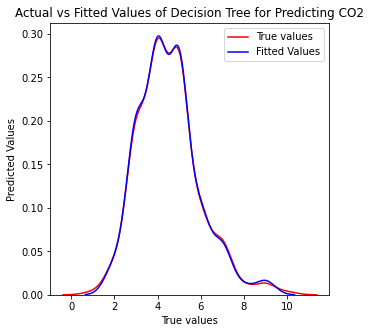

In [16]:
plt.figure(figsize=(5,5))
ax1 = sns.distplot(Y_test, hist=False, color = "r", label="Actual Value")
sns.distplot(pred_dt, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.title("Actual vs Fitted Values of Decision Tree for Predicting CO2")
plt.xlabel("True values")
plt.ylabel("Predicted Values")
plt.legend(["True values", "Fitted Values"])
plt.show()

SUPPORT VECTOR CLASSIFIER

In [11]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn import metrics

sv = SVC(kernel="linear")
sv.fit(X_train, Y_train)

pred_sv = sv.predict(X_test)

#MSE = np.square(np.subtract(Y_test, pred_sv)).mean()
#RMSE = math.sqrt(MSE)
#print("RMSE: ", RMSE)

print("Recall score: %.3f" % recall_score(Y_test, pred_sv,average='weighted',zero_division=1))
print("F1 score: %.3f" % f1_score(Y_test, pred_sv,average='weighted',zero_division=1))
print('Precision Score: %.3f' % precision_score(Y_test, pred_dt,average='weighted',zero_division=1))

Recall score: 0.986
F1 score: 0.984
Precision Score: 0.987


c:\Users\Sundas.Mohsin\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Sundas.Mohsin\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


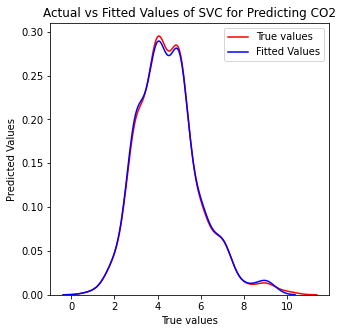

In [12]:
plt.figure(figsize=(5,5))
ax1 = sns.distplot(Y_test, hist=False, color = "r", label="Actual Value")
sns.distplot(pred_sv, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.title("Actual vs Fitted Values of SVC for Predicting CO2")
plt.xlabel("True values")
plt.ylabel("Predicted Values")
plt.legend(["True values", "Fitted Values"])
plt.show()